In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('all_auction_add_close.csv', encoding = 'utf8')
# df.head()

In [4]:
df['開標日期'] = pd.to_datetime(df['開標日期'])
# df['開標日期']

In [5]:
## 刪掉重複的一筆
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='泰昇-KY')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='泰昇-KY']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價,可轉債個股投標最後一天均價
183,2017-01-03,泰昇-KY,8480,集中交易市場,第一上市初上市,美國標,"3,400",82.31,2,425,...,2.5,"1,066","12,763",110.22,124,112.22,107.0,299.4164,114.5,NaN


In [6]:
index_name = df[(df['得標總金額(元)'] == '0') & (df['證券名稱'] =='聯廣')].index
df.drop(index_name, inplace = True)
df.reset_index()
df[df['證券名稱'] =='聯廣']

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍方式,競拍數量(張),最低投標價格(元),最低每標單投標數量(張),最高投(得)標數量(張),...,得標手續費率(%),總合格件,合格投標數量(張),最低得標價格(元),最高得標價格(元),得標加權平均價格(元),承銷價格(元),投標最後一天平均成交價,撥券日開盤價,可轉債個股投標最後一天均價
137,2018-03-09,聯廣,8497,集中交易市場,初上市,美國標,"4,680",40,1,672,...,4.0,"1,383","23,949",47.6,53.1,49.05,46.0,58.53,NaN,NaN


## 不考慮得標總金額為 0 的資料 (可能是流標 或 正在標)

In [7]:
index_name = df[(df['得標總金額(元)'] == '0')].index
df.drop(index_name, inplace = True)

In [8]:
def label_stock(row):
    if row['發行性質'] in ['有擔保轉換公司債','無擔保轉換公司債']:
        return "cb"
    else:
        return "stock" 

df['類別'] = df.apply(lambda row : label_stock(row), axis = 1)

print('stock筆數 =', sum(df['類別'] == 'stock'))
print('cb筆數 =', sum(df['類別'] == 'cb'))

stock筆數 = 173
cb筆數 = 26


## 股票熱度影響

In [9]:
# df_time = df[['開標日期','證券名稱','證券代號','類別','競拍數量(張)', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)','最高得標價格(元)', '得標加權平均價格(元)','投標最後一天平均成交價','總合格件', '合格投標數量(張)']]

# obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '總合格件', '合格投標數量(張)']
# for col in obj_col:
#     df_time[col] = df_time[col].apply(lambda x: x.replace(',', '')) 
#     df_time[col] = df_time[col].apply(pd.to_numeric, errors = 'coerce')

# df_time['總投標金額'] = df_time['得標加權平均價格(元)'] * df_time['合格投標數量(張)']
# df_time['最低得標相對底標漲幅'] = df_time['最低得標價格(元)']/ df_time['最低投標價格(元)']*100 -100
# df_time['加權得標相對底標漲幅'] = df_time['得標加權平均價格(元)']/ df_time['最低投標價格(元)']*100 -100
# df_time['最高得標相對底標漲幅'] = df_time['最高得標價格(元)']/ df_time['最低投標價格(元)']*100 -100
# df_time['投標競爭度'] = df_time['合格投標數量(張)'] / df_time['競拍數量(張)']
# df_time['每標平均張數'] = df_time['合格投標數量(張)'] / df_time['總合格件']

# df_time.index = df_time['開標日期']

## 準備模型配適資料: 選出df開標前就知道的資訊 + 最低得標價(Y)

In [10]:
df_1 = df[['開標日期','證券名稱', '證券代號', '發行市場', '發行性質', '競拍數量(張)','類別', '最低投標價格(元)', '最低每標單投標數量(張)','每一投標單投標處理費(元)', '得標手續費率(%)', '投標最後一天平均成交價', '最低得標價格(元)']]
df_1.head()

,開標日期,證券名稱,證券代號,發行市場,發行性質,競拍數量(張),類別,最低投標價格(元),最低每標單投標數量(張),每一投標單投標處理費(元),得標手續費率(%),投標最後一天平均成交價,最低得標價格(元)
7,2020-11-27,耀登科技,3138,集中交易市場,初上市,"3,740",stock,42.59,1,400,4.8,80.84,68.6
8,2020-11-26,叡揚資訊,6752,櫃檯買賣,初上櫃,"1,800",stock,50,1,400,4.0,67.49,58.51
9,2020-11-23,台驊四,26364,櫃檯買賣,無擔保轉換公司債,"2,550",cb,102,1,400,0.5,NaN,104.2
10,2020-11-17,亞泰金屬,6727,櫃檯買賣,初上櫃,"2,005",stock,48,1,400,5.0,68.97,62.4
11,2020-11-10,八貫,1342,集中交易市場,初上市,"4,234",stock,50,1,400,4.5,76.48,63.6


In [11]:
# df_1['發行性質'].value_counts()

* 將股票和可轉債分開

In [12]:
df1_stock = df_1[df_1['類別'] == 'stock']
df1_cb = df_1[df_1['類別'] == 'cb']

print('股票',df1_stock.shape[0],'可轉債', df1_cb.shape[0])

股票 173 可轉債 26


* 刪除有遺漏值的row

In [13]:
# 直接把有遺漏值的row都刪掉(stock有17筆遺漏值)
df1_stock.dropna(inplace = True)
df1_stock.shape

(156, 13)

* 轉換資料型別

In [14]:
obj_col = ['競拍數量(張)', '最低投標價格(元)', '最低得標價格(元)']
for col in obj_col:
    df1_stock[col] = df1_stock[col].apply(lambda x: x.replace(',', '')) 
    df1_stock[col] = df1_stock[col].apply(pd.to_numeric, errors = 'coerce')

df1_stock.isnull().apply(lambda x: sum(x))
df1_stock.dtypes

開標日期             datetime64[ns]
證券名稱                     object
證券代號                      int64
發行市場                     object
發行性質                     object
競拍數量(張)                   int64
類別                       object
最低投標價格(元)               float64
最低每標單投標數量(張)              int64
每一投標單投標處理費(元)             int64
得標手續費率(%)               float64
投標最後一天平均成交價             float64
最低得標價格(元)               float64
dtype: object

* 初步刪除outliers

In [15]:
# 初步剔除outlier
outlier = df1_stock['最低投標價格(元)'] > 1200
df1_stock[outlier]

index = df1_stock[outlier].index
df1_stock.drop(index, inplace = True)

df1_stock.shape

(155, 13)

* 剔除第一上市初上市, 第一上櫃初上櫃

In [16]:
index = df1_stock[df1_stock['發行性質']=='第一上市初上市'].index
df1_stock.drop(index, inplace = True)

index = df1_stock[df1_stock['發行性質']=='第一上櫃初上櫃'].index
df1_stock.drop(index, inplace = True)

df1_stock.shape

(146, 13)

* 最低每標單投標數量(張), 每一投標單投標處理費(元), 得標手續費率(%) , 發行性質轉成類別資料

In [17]:
# 最低每標單投標數量(張)
dummies = pd.get_dummies(df1_stock['最低每標單投標數量(張)'])
dummies.columns = ['最低每標單投_1','最低每標單投_2','最低每標單投_3','最低每標單投_5']
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
# 刪除原始column
df1_stock.drop(['最低每標單投標數量(張)'], axis = 1, inplace = True)
# df1_stock.head()

In [18]:
# 每一投標單投標處理費(元)
dummies = pd.get_dummies(df1_stock['每一投標單投標處理費(元)'])
dummies.columns = ['處理費_400','處理費_500']
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
# 刪除原始column
df1_stock.drop(['每一投標單投標處理費(元)'], axis = 1, inplace = True)

In [19]:
# 得標手續費率(%)
dummies = pd.get_dummies(df1_stock['得標手續費率(%)'])
dummies.columns = ['手續費_2.5', '手續費_2.75', '手續費_3', '手續費_3.5', '手續費_4', '手續費_4.2', '手續費_4.5', '手續費_4.8', '手續費_5']
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
# 刪除原始column
df1_stock.drop(['得標手續費率(%)'], axis = 1, inplace = True)

In [20]:
df1_stock['發行性質'].value_counts()

初上櫃    90
初上市    56
Name: 發行性質, dtype: int64

In [21]:
# 發行性質
dummies = pd.get_dummies(df1_stock['發行性質'])
df1_stock = pd.concat([df1_stock, dummies], axis = 1)
# 刪除原始column
df1_stock.drop(['發行性質'], axis = 1, inplace = True)

In [22]:
df1_stock.shape

(146, 26)

In [23]:
df1_stock.drop(['開標日期', '證券名稱', '證券代號', '發行市場','類別'], axis = 1, inplace = True)
df1_stock.shape

(146, 21)

* 整理dummy var., 做出可以拿去訓練的資料集

In [24]:
df1_stock_train = df1_stock.drop(['最低每標單投_1', '處理費_400', '手續費_2.75', '初上市'], axis = 1)
df1_stock_train.shape 

(146, 17)

* 再次刪除outliers, 57和178

In [25]:
df1_stock_train.iloc[(df1_stock_train.index == 57) | (df1_stock_train.index == 178), :]

,競拍數量(張),最低投標價格(元),投標最後一天平均成交價,最低得標價格(元),最低每標單投_2,最低每標單投_3,最低每標單投_5,處理費_500,手續費_2.5,手續費_3,手續費_3.5,手續費_4,手續費_4.2,手續費_4.5,手續費_4.8,手續費_5,初上櫃
57,101081,45.69,130.59,60.88,1,0,0,0,0,0,0,0,0,0,0,0,0
178,2032,28.00,20.24,44.01,1,0,0,1,0,0,0,0,0,1,0,0,1


In [26]:
df1_stock_train.drop([57, 178], axis = 0, inplace = True)
df1_stock_train.shape

(144, 17)

## 模型

In [27]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats

In [36]:
x_2 = df1_stock_train[['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '手續費_5', '初上櫃']]
x_lm2 = sm.add_constant(x_2)
lm2 = sm.OLS(df1_stock_train['最低得標價格(元)'], x_lm2).fit()
lm2.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     4946.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          1.79e-157
Time:                        13:26:31   Log-Likelihood:                -444.53
No. Observations:                 144   AIC:                             903.1
Df Residuals:                     137   BIC:                             923.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.2367      1.390     -1.610      0.110      -4.984       0.511
投標最後一天平均成交價     0.8746      0.005    162.590      0.000       0.864       0.885
處理費_500        -2.1873      1.387     -1.577      0.117      -4.930       0.555
手續費_2.5         9.5657      3.039      3.148      0.002       3.557      15.575
手續費_4.5        -2.3931      1.366     -1.751      0.082      -5.095       0.309
手續費_5          -1.0956      1.404     -0.780      0.437      -3.872       1.681
初上櫃             2.5464      0.935      2.724      0.007       0.698       4.395
==============================================================================
Omnibus:                       24.849   Durbin-Watson:                   1.823
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.662
Skew:                          -0.670   Prob(JB):                     4.08e-14
Kurtosis:                       5.913   Cond. No.                         872.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
x_3 = df1_stock_train[['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '初上櫃']]
x_lm3 = sm.add_constant(x_3)
lm3 = sm.OLS(df1_stock_train['最低得標價格(元)'], x_lm3).fit()
lm3.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     5952.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          2.99e-159
Time:                        13:26:34   Log-Likelihood:                -444.85
No. Observations:                 144   AIC:                             901.7
Df Residuals:                     138   BIC:                             919.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -2.8812      1.116     -2.582      0.011      -5.088      -0.675
投標最後一天平均成交價     0.8736      0.005    167.036      0.000       0.863       0.884
處理費_500        -1.9300      1.345     -1.435      0.154      -4.590       0.730
手續費_2.5        10.1124      2.953      3.425      0.001       4.274      15.951
手續費_4.5        -1.6869      1.022     -1.650      0.101      -3.708       0.335
初上櫃             2.5572      0.933      2.740      0.007       0.712       4.403
==============================================================================
Omnibus:                       26.844   Durbin-Watson:                   1.820
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.465
Skew:                          -0.725   Prob(JB):                     2.24e-15
Kurtosis:                       6.023   Cond. No.                         843.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
x_4 = df1_stock_train[['投標最後一天平均成交價', '手續費_2.5', '初上櫃']]
x_lm4 = sm.add_constant(x_4)
lm4 = sm.OLS(df1_stock_train['最低得標價格(元)'], x_lm4).fit()
lm4.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     9820.
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          1.64e-162
Time:                        13:26:35   Log-Likelihood:                -446.61
No. Observations:                 144   AIC:                             901.2
Df Residuals:                     140   BIC:                             913.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -4.1622      0.861     -4.836      0.000      -5.864      -2.461
投標最後一天平均成交價     0.8742      0.005    168.675      0.000       0.864       0.884
手續費_2.5         9.3058      2.804      3.318      0.001       3.761      14.850
初上櫃             2.6192      0.937      2.795      0.006       0.766       4.472
==============================================================================
Omnibus:                       24.778   Durbin-Watson:                   1.789
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               63.375
Skew:                          -0.655   Prob(JB):                     1.73e-14
Kurtosis:                       5.974   Cond. No.                         787.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
x_5 = df1_stock_train[['最低投標價格(元)', '投標最後一天平均成交價']]
x_lm5 = sm.add_constant(x_5)
lm5 = sm.OLS(df1_stock_train['最低得標價格(元)'], x_lm5).fit()
lm5.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              最低得標價格(元)   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                 1.428e+04
Date:                Mon, 14 Dec 2020   Prob (F-statistic):          1.76e-163
Time:                        13:26:36   Log-Likelihood:                -449.36
No. Observations:                 144   AIC:                             904.7
Df Residuals:                     141   BIC:                             913.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -3.1318      0.679     -4.613      0.000      -4.474      -1.790
最低投標價格(元)       0.2002      0.054      3.704      0.000       0.093       0.307
投標最後一天平均成交價     0.7607      0.032     23.803      0.000       0.698       0.824
==============================================================================
Omnibus:                       13.004   Durbin-Watson:                   1.592
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               26.844
Skew:                          -0.338   Prob(JB):                     1.48e-06
Kurtosis:                       5.004   Cond. No.                         219.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
lm2_pred = np.round(lm2.predict(x_lm2), 2)
lm3_pred = np.round(lm3.predict(x_lm3), 2)
lm4_pred = np.round(lm4.predict(x_lm4), 2)
lm5_pred = np.round(lm5.predict(x_lm5), 2)

## 評估獲利

In [454]:
df.columns

Index(['開標日期', '證券名稱', '證券代號', '發行市場', '發行性質', '競拍方式', '競拍數量(張)', '最低投標價格(元)',
       '最低每標單投標數量(張)', '最高投(得)標數量(張)', '保證金成數(%)', '每一投標單投標處理費(元)',
       '撥券日期(上市、上櫃日期)', '主辦券商', '得標總金額(元)', '得標手續費率(%)', '總合格件', '合格投標數量(張)',
       '最低得標價格(元)', '最高得標價格(元)', '得標加權平均價格(元)', '承銷價格(元)', '投標最後一天平均成交價',
       '撥券日開盤價', '可轉債個股投標最後一天均價', '類別'],
      dtype='object')

In [34]:
def suc_n_profit(df, df_stock, pred):
    df_output = pd.DataFrame()
    df_output['最低投標價格(元)'] = df_stock['最低投標價格(元)']
    df_output['最低得標價格(元)'] = df_stock['最低得標價格(元)']
    df_output['撥券日開盤價'] = df.loc[df_stock.index, '撥券日開盤價']
    df_output['pred_y'] = pred
    df_output['success'] = 0
    df_output['success'] = np.where(df_output['pred_y'] >= df_output['最低得標價格(元)'], 1, 0)
    df_output['profit'] = np.where(df_output['success'] == 1, (df_output['撥券日開盤價']*1000 - (400 + df_output['pred_y']*1.05*1000)), -500)

    return df_output

In [456]:
# 有三筆train data的'撥券日開盤價'是nan
sum(df.loc[df1_stock_train.index, '撥券日開盤價'].isnull())

3

In [471]:
max_profit = lm2_suc_n_profit['撥券日開盤價']*1000 - (lm2_suc_n_profit['最低得標價格(元)']*1.05*1000 + 400)
print('完全不可能贏:', sum(max_profit < 0))
print('有機會贏:', sum(max_profit > 0))

完全不可能贏: 36
有機會贏: 105


In [42]:
lm2_suc_n_profit = suc_n_profit(df, df1_stock_train, lm2_pred)
lm2_suc_n_profit.fillna(0, inplace = True)
lm2_suc_n_profit[['最低投標價格(元)', '最低得標價格(元)', 'pred_y', 'success', '撥券日開盤價', 'profit']]

,最低投標價格(元),最低得標價格(元),pred_y,success,撥券日開盤價,profit
7,42.59,68.60,68.46,0,0.0,-500.0
8,50.00,58.51,59.33,1,0.0,0.0
10,48.00,62.40,59.53,0,66.2,-500.0
11,50.00,63.60,62.26,0,63.0,-500.0
12,34.86,49.90,34.48,0,52.8,-500.0
...,...,...,...,...,...,...
200,11.64,17.21,11.28,0,20.6,-500.0
205,24.00,33.76,29.07,0,46.0,-500.0
206,152.89,207.11,207.00,0,250.0,-500.0
207,108.80,138.21,140.39,1,144.0,-3809.5


In [43]:
lm3_suc_n_profit = suc_n_profit(df, df1_stock_train, lm3_pred)
lm3_suc_n_profit.fillna(0, inplace = True)
lm3_suc_n_profit[['最低投標價格(元)', '最低得標價格(元)', 'pred_y', 'success', '撥券日開盤價', 'profit']]

,最低投標價格(元),最低得標價格(元),pred_y,success,撥券日開盤價,profit
7,42.59,68.60,67.74,0,0.0,-500.0
8,50.00,58.51,58.64,1,0.0,0.0
10,48.00,62.40,59.93,0,66.2,-500.0
11,50.00,63.60,62.24,0,63.0,-500.0
12,34.86,49.90,34.90,0,52.8,-500.0
...,...,...,...,...,...,...
200,11.64,17.21,11.97,0,20.6,-500.0
205,24.00,33.76,29.74,0,46.0,-500.0
206,152.89,207.11,206.40,0,250.0,-500.0
207,108.80,138.21,140.42,1,144.0,-3841.0


In [44]:
lm4_suc_n_profit = suc_n_profit(df, df1_stock_train, lm4_pred)
lm4_suc_n_profit.fillna(0, inplace = True)
lm4_suc_n_profit[['最低投標價格(元)', '最低得標價格(元)', 'pred_y', 'success', '撥券日開盤價', 'profit']]

,最低投標價格(元),最低得標價格(元),pred_y,success,撥券日開盤價,profit
7,42.59,68.60,66.51,0,0.0,-500.0
8,50.00,58.51,57.46,0,0.0,-500.0
10,48.00,62.40,58.75,0,66.2,-500.0
11,50.00,63.60,62.70,0,63.0,-500.0
12,34.86,49.90,33.71,0,52.8,-500.0
...,...,...,...,...,...,...
200,11.64,17.21,12.63,0,20.6,-500.0
205,24.00,33.76,30.41,0,46.0,-500.0
206,152.89,207.11,207.26,1,250.0,31977.0
207,108.80,138.21,140.42,1,144.0,-3841.0


In [108]:
# lm5_suc_n_profit = suc_n_profit(df, df1_stock_train, lm5_pred)
# lm5_suc_n_profit.fillna(0, inplace = True)
# lm5_suc_n_profit[['最低投標價格(元)', '最低得標價格(元)', 'pred_y', 'success', '撥券日開盤價', 'profit']]


In [46]:
lm2_suc_n_profit['success'].value_counts()

0    81
1    63
Name: success, dtype: int64

In [47]:
lm3_suc_n_profit['success'].value_counts()

0    81
1    63
Name: success, dtype: int64

In [48]:
lm4_suc_n_profit['success'].value_counts()

0    88
1    56
Name: success, dtype: int64

In [109]:
# lm5_suc_n_profit['success'].value_counts()

In [110]:
print('profit of lm2 =', np.round(sum(lm2_suc_n_profit[(lm2_suc_n_profit['profit'] != 0) & (lm2_suc_n_profit['profit'] != -99)]['profit']), 2))
print('profit of lm3 =', np.round(sum(lm3_suc_n_profit[(lm3_suc_n_profit['profit'] != 0) & (lm3_suc_n_profit['profit'] != -99)]['profit']), 2))
print('profit of lm4 =', np.round(sum(lm4_suc_n_profit[(lm4_suc_n_profit['profit'] != 0) & (lm4_suc_n_profit['profit'] != -99)]['profit']), 2))
# print('profit of lm5 =', np.round(sum(lm5_suc_n_profit[(lm5_suc_n_profit['profit'] != 0) & (lm5_suc_n_profit['profit'] != -99)]['profit']), 2))

profit of lm2 = 148540.5
profit of lm3 = 142123.0
profit of lm4 = 121784.5


In [80]:
lm2_suc_n_profit[lm2_suc_n_profit['profit'] < 0].shape[0]
lm2_suc_n_profit[lm2_suc_n_profit['profit'] > 0].shape[0]

29

## 回測

* 策略一

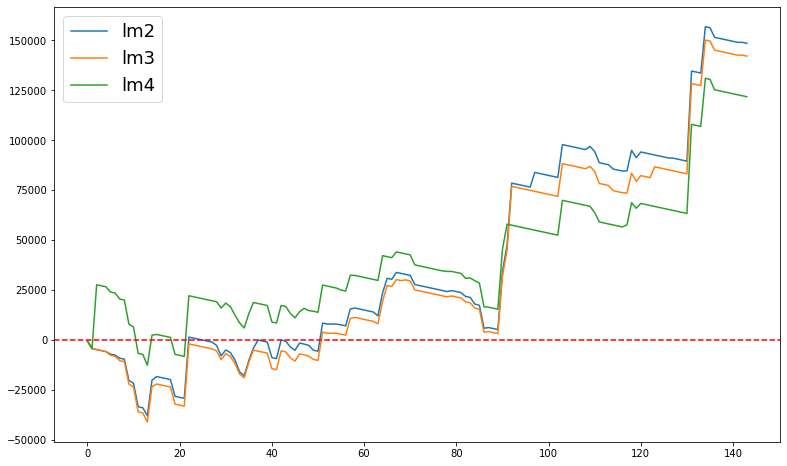

In [107]:
lm2_trend = lm2_suc_n_profit.iloc[::-1, 5].cumsum().reset_index(drop = True)
lm3_trend = lm3_suc_n_profit.iloc[::-1, 5].cumsum().reset_index(drop = True)
lm4_trend = lm4_suc_n_profit.iloc[::-1, 5].cumsum().reset_index(drop = True)

plt.figure(figsize = (13, 8))
plt.plot(lm2_trend, label = 'lm2')
plt.plot(lm3_trend, label = 'lm3')
plt.plot(lm4_trend, label = 'lm4')

plt.axhline(0, color = 'r', linestyle = '--')

plt.legend(fontsize = 18)

In [88]:
def odds(suc_n_pro):
    loses = suc_n_pro[suc_n_pro['profit'] < 0].shape[0]
    wins = suc_n_pro[suc_n_pro['profit'] > 0].shape[0]
    print('wins =', wins, 'loses =', loses)
    print('sum loses =', np.round(sum(suc_n_pro[suc_n_pro['profit'] < 0]['profit']), 2))
    print('sum wins =', np.round(sum(suc_n_pro[suc_n_pro['profit'] > 0]['profit']), 2))

    a = sum(suc_n_pro[suc_n_pro['profit'] < 0]['profit']) / loses
    b = sum(suc_n_pro[suc_n_pro['profit'] > 0]['profit']) / wins

    return a/b
print('lm2:')
lm2_odds = np.round(odds(lm2_suc_n_profit), 2)

print('\nlm3:')
lm3_odds = np.round(odds(lm3_suc_n_profit), 2)

print('\nlm4:')
lm4_odds = np.round(odds(lm4_suc_n_profit), 2)

print('\nlm2_odds =', lm2_odds)
print('lm3_odds =', lm3_odds)
print('lm4_odds =', lm4_odds)

lm2:
wins = 29 loses = 113
sum loses = -161934.0
sum wins = 310474.5

lm3:
wins = 27 loses = 115
sum loses = -162256.5
sum wins = 304379.5

lm4:
wins = 23 loses = 121
sum loses = -164983.5
sum wins = 286768.0

lm2_odds = -0.13
lm3_odds = -0.13
lm4_odds = -0.11


* 策略二

In [129]:
def suc_n_pro_2(principal, df_stock, lm_pred):
    df_output = pd.DataFrame()
    df_output['最低投標價格(元)'] = df_stock['最低投標價格(元)']
    df_output['最低得標價格(元)'] = df_stock['最低得標價格(元)']
    df_output['撥券日開盤價'] = df_stock['撥券日開盤價']
    df_output['pred_y'] = lm_pred
    df_output['success'] = 0
    df_output['success'] = np.where(df_output['pred_y'] >= df_output['最低得標價格(元)'], 1, 0)

    quantity = principal // (1000*lm_pred)
    df_output['quantity'] = quantity
    df_output['profit'] = np.where(df_output['success'] == 1, (df_output['撥券日開盤價'] - df_output['pred_y']*1.05)*1000*df_output['quantity'] - 500 , -500)

    return df_output

In [175]:
def strategy2(principal, lm_feature, df_stock):
    x_lm = sm.add_constant(df_stock[lm_feature])
    lm = sm.OLS(df_stock['最低得標價格(元)'], x_lm).fit()

    lm_pred = np.round(lm.predict(x_lm), 2)
    df_output = suc_n_pro_2(principal, df_stock, lm_pred)
    df_output.fillna(0, inplace = True)

    loses = df_output[df_output['profit'] < 0].shape[0]
    wins = df_output[df_output['profit'] > 0].shape[0]

    sum_loses = np.round(sum(df_output[df_output['profit'] < 0]['profit']), 2)
    sum_wins = np.round(sum(df_output[df_output['profit'] > 0]['profit']), 2)

    a = sum(df_output[df_output['profit'] < 0]['profit']) / loses
    b = sum(df_output[df_output['profit'] > 0]['profit']) / wins

    # print(loses, wins, sum_loses, sum_wins, b/a)
    df_odds = pd.DataFrame(np.array([[loses, wins, sum_loses, sum_wins, sum_wins + sum_loses, -b/a]]), columns = ['loses', 'wins', 'sum_loses', 'sum_wins', 'balance', 'odds'])

    return df_output, df_odds

In [124]:
lm2_x = ['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '手續費_5', '初上櫃']
lm3_x = ['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '初上櫃']
lm4_x = ['投標最後一天平均成交價', '手續費_2.5', '初上櫃']
df_stock = df1_stock_train
df_stock['撥券日開盤價'] = df.loc[df_stock.index, '撥券日開盤價']

In [176]:
lm2_suc_n_pro_2, lm2_odds_2 = strategy2(5000000, lm2_x, df_stock)
lm3_suc_n_pro_2, lm3_odds_2 = strategy2(5000000, lm3_x, df_stock)
lm4_suc_n_pro_2, lm4_odds_2 = strategy2(5000000, lm4_x, df_stock)

In [161]:
# lm2_suc_n_pro_2

In [177]:
lm2_odds_2

,loses,wins,sum_loses,sum_wins,balance,odds
0,112.0,30.0,-8950147.0,21663210.5,12713063.5,9.036275


In [178]:
lm3_odds_2

,loses,wins,sum_loses,sum_wins,balance,odds
0,113.0,29.0,-8768308.0,20666387.0,11898079.0,9.183944


In [179]:
 lm4_odds_2

,loses,wins,sum_loses,sum_wins,balance,odds
0,116.0,28.0,-8397354.0,17739792.0,9342438.0,8.751974


In [ ]:
strategy2(5000000, lm2_x, df_stock)

In [106]:
# result = pd.DataFrame()
# result['pred_2'] = lm2_suc_n_profit['pred_y']
# result['pred_3'] = lm3_suc_n_profit['pred_y']
# result['pred_4'] = lm4_suc_n_profit['pred_y']
# result['pred_5'] = lm5_suc_n_profit['pred_y']

# result['最低得標價格(元)'] = lm2_suc_n_profit['最低得標價格(元)']
# result['撥券日開盤價'] = lm2_suc_n_profit['撥券日開盤價']

# result['success_2'] = lm2_suc_n_profit['success']
# result['success_3'] = lm3_suc_n_profit['success']
# result['success_4'] = lm4_suc_n_profit['success']
# result['success_5'] = lm5_suc_n_profit['success']

# result['profit_2'] = lm2_suc_n_profit['profit']
# result['profit_3'] = lm3_suc_n_profit['profit']
# result['profit_4'] = lm4_suc_n_profit['profit']
# result['profit_5'] = lm5_suc_n_profit['profit']

# # result

In [550]:
# result.to_csv('result.csv', index = False)

## cv porfit==

In [61]:
df_stock = df1_stock_train
df_stock['撥券日開盤價'] = df.loc[df_stock.index, '撥券日開盤價']

def cv_profit(lm_feature, df_stock):
    success = []
    profit = []
    for i in range(5):
        data_used = df_stock.sample(n = 100)
        x_lm = sm.add_constant(data_used[lm_feature])
        lm = sm.OLS(data_used['最低得標價格(元)'], x_lm).fit()

        test_data = df_stock.drop(data_used.index)
        lm_pred = np.round(lm.predict(sm.add_constant(test_data[lm_feature])), 2)

        lm_suc_n_profit = suc_n_profit(df, test_data, lm_pred)
        lm_suc_n_profit.fillna(0, inplace = True)

        suc = np.mean(lm_suc_n_profit['success'])
        pro = np.round(sum(lm_suc_n_profit['profit']), 2)

        success.append(suc)
        profit.append(pro)
    
    return success, profit

In [67]:
lm2_x = ['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '手續費_5', '初上櫃']
lm2_suc, lm2_pro = cv_profit(lm2_x, df_stock)

In [68]:
lm3_x = ['投標最後一天平均成交價','處理費_500', '手續費_2.5', '手續費_4.5', '初上櫃']
lm3_suc, lm3_pro = cv_profit(lm3_x, df_stock)

In [69]:
lm4_x = ['投標最後一天平均成交價', '手續費_2.5', '初上櫃']
lm4_suc, lm4_pro = cv_profit(lm4_x, df_stock)

In [72]:
print('lm2 cv profit =', np.mean(lm2_pro))
print('lm3 cv profit =', np.mean(lm3_pro))
print('lm4 cv profit =', np.mean(lm4_pro))

lm2 cv profit = 17939.4
lm3 cv profit = 33341.0
lm4 cv profit = 21039.6
